In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [23]:
scores = []

In [24]:
#da
scores.append([0.5  , 0.625, 0.625, 0.625])

In [25]:
#dn
scores.append([0.6, 0.4, 0.6, 0.6])

In [26]:
#esn
scores.append([0.42857143, 0.57142857, 0.42857143, 0.42857143])

In [30]:
#eva
scores.append([0.64285714, 0.5       , 0.64285714, 0.42857143])

In [31]:
#fd
scores.append([0.6, 0.6, 0.6, 0.4])

In [32]:
#fit
scores.append([0.5 , 0.5 , 0.75, 0.5 ])

In [33]:
#kmh
scores.append([0.71428571, 0.71428571, 0.42857143, 0.42857143])

In [34]:
#mld
scores.append([0.5  , 0.5  , 0.625, 0.375])

In [35]:
#mni
scores.append([0.5, 0.4, 0.6, 0.6])

In [36]:
#mrl
scores.append([0.54545455, 0.54545455, 0.63636364, 0.54545455])

In [37]:
#yngyn
scores.append([0.4 , 0.4 , 0.55, 0.4 ])

In [38]:
#ysf
scores.append([0.57142857, 0.42857143, 0.57142857, 0.42857143])


In [39]:
scores_df = pd.DataFrame(
    data=scores, 
    columns=['mean','max','min','skew'])

In [40]:
scores_df.count()

mean    14
max     14
min     14
skew    14
dtype: int64

In [41]:
accuracies = []
feat = []
for col in scores_df.columns:
    accuracies = np.concatenate((accuracies, scores_df[col].values))
    feat += [col] * len(scores_df[col])
# print([accuracies,freqs])
scs = pd.DataFrame(data=list(zip(accuracies,feat)), columns=['acc','feat'])

C:\Users\Alberto\AppData\Local\Temp\ipykernel_12688\1995261028.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_val = scs[scs['feat']==sample_name].median()[0]
C:\Users\Alberto\AppData\Local\Temp\ipykernel_12688\1995261028.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_val = scs[scs['feat']==sample_name].median()[0]
C:\Users\Alberto\AppData\Local\Temp\ipykernel_12688\1995261028.py:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to

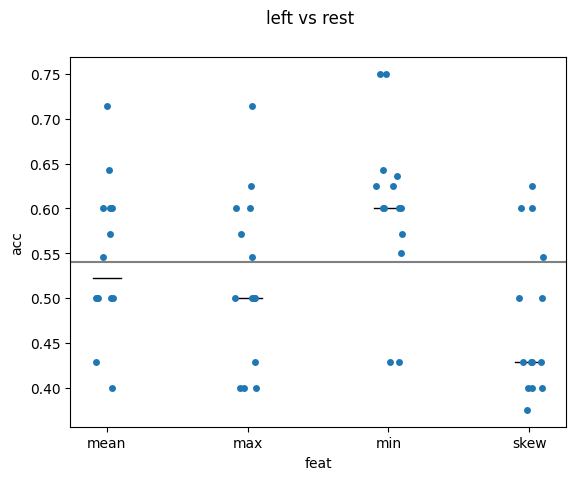

In [42]:
csp_fig, axes = plt.subplots(1)
csp_fig.suptitle('left vs rest')
axes.axhline(.54, c='grey')
sns.stripplot(y='acc', x='feat', data=scs, ax=axes)
median_width= 0.2
for tick, text in zip(axes.get_xticks(), axes.get_xticklabels()):
    sample_name = text.get_text()  # "X" or "Y"
    # calculate the median value for all replicates of either X or Y
    median_val = scs[scs['feat']==sample_name].median()[0]
    # plot horizontal lines across the column, centered on the tick
    axes.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
            lw=1, color='k')